In [1]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, precision_recall_curve, RocCurveDisplay, roc_curve, auc, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.linear_model import RidgeCV, LinearRegression

In [2]:
df = pd.read_csv("complete.csv", index_col=0)

classes = df["type"]
df = df.drop(columns="type")


In [3]:
x_train, x_test, y_train, y_test = train_test_split(df, classes, test_size=0.3, random_state=42, shuffle=True)
labels = ["bengin", "trojan", "worm", "backdoor", "encrypter", "downloader"]



# Random Forest

In [4]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred = np.array(y_pred)
y_test = np.array(y_test)

## Code to convert classes to binary

In [5]:
y_test_split = [[],[],[],[],[],[],[],[],[]]
y_pred_split = [[],[],[],[],[],[],[],[],[]]
y_test_bin = []
y_pred_bin = []

index = 0
while index < len(y_pred):
    if y_test[index] == y_pred[index]:
        y_test_split[y_test[index]].append(1)
        y_pred_split[y_test[index]].append(1)
        y_test_bin.append(1)
        y_pred_bin.append(1)
    else:
        y_test_split[y_test[index]].append(1)
        y_pred_split[y_test[index]].append(0)
        y_test_bin.append(0)
        y_pred_bin.append(1)
    index += 1

## Precision-Recall metric


In [6]:
labelIndex = 0
while labelIndex < len(labels):
    print(labels[labelIndex] + ":")
    print(str(precision_score(y_test, y_pred, labels=[labelIndex], average="macro")))
    print(str(recall_score(y_test, y_pred, labels=[labelIndex], average="macro")))
    labelIndex += 1



bengin:
0.9797297297297297
0.9931506849315068
trojan:
0.6
0.46875
worm:
0.42105263157894735
0.6153846153846154
backdoor:
0.9024390243902439
0.8705882352941177
encrypter:
0.0
0.0
downloader:
0.0
0.0


/home/oliver/Documents/Uni/SIT324/9.3HD/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/oliver/Documents/Uni/SIT324/9.3HD/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Confusion Matrix

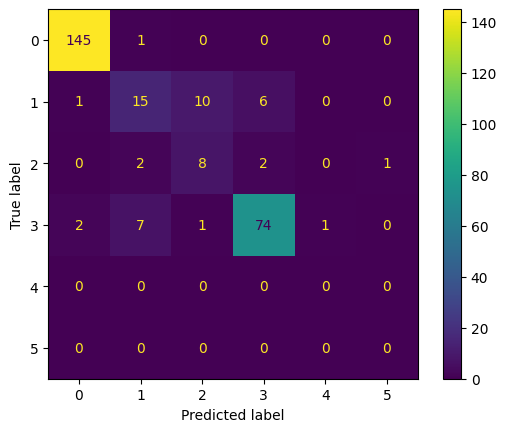

In [7]:
matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix)
cm_display.plot()
plt.show()

## Receiver Operating Characteristic

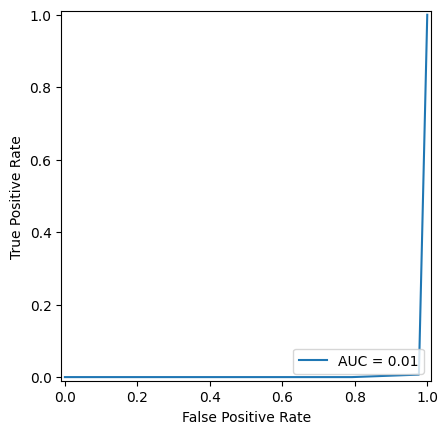

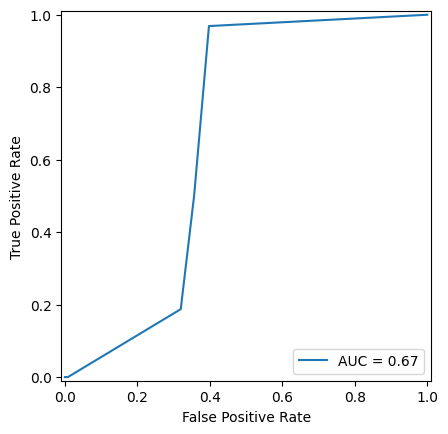

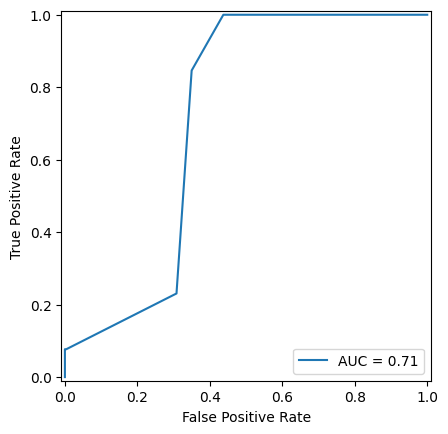

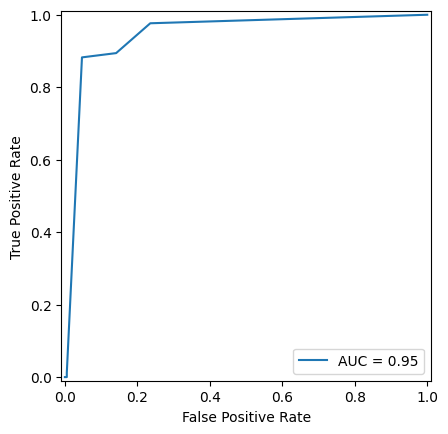

/home/oliver/Documents/Uni/SIT324/9.3HD/.venv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


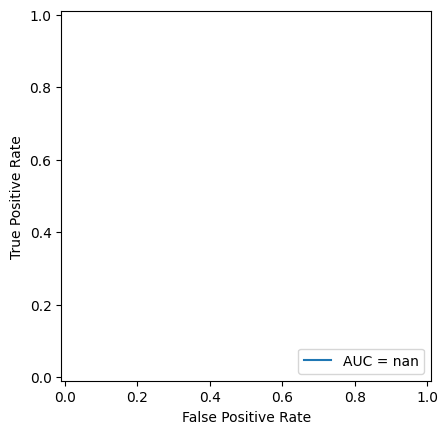

/home/oliver/Documents/Uni/SIT324/9.3HD/.venv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


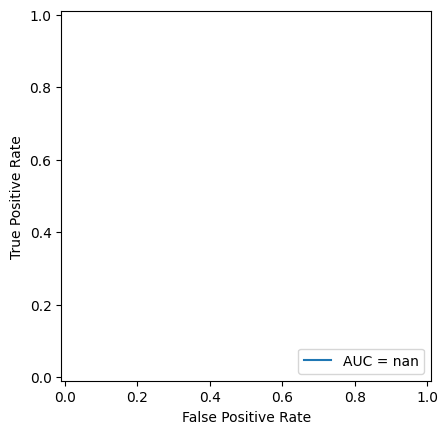

In [8]:
index = 0
while index < len(labels):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=index)
    roc_auc = auc(fpr, tpr)

    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

    display.plot()

    plt.show()
    index += 1

## Accuracy

In [9]:
print(accuracy_score(y_test, y_pred))

0.8768115942028986


# Tree classifier

In [10]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred = np.array(y_pred)
y_test = np.array(y_test)

In [11]:
y_test_split = [[],[],[],[],[],[],[],[],[]]
y_pred_split = [[],[],[],[],[],[],[],[],[]]
y_test_bin = []
y_pred_bin = []

index = 0
while index < len(y_pred):
    if y_test[index] == y_pred[index]:
        y_test_split[y_test[index]].append(1)
        y_pred_split[y_test[index]].append(1)
        y_test_bin.append(1)
        y_pred_bin.append(1)
    else:
        y_test_split[y_test[index]].append(1)
        y_pred_split[y_test[index]].append(0)
        y_test_bin.append(0)
        y_pred_bin.append(1)
    index += 1

In [12]:
labelIndex = 0
while labelIndex < len(labels):
    print(labels[labelIndex] + ":")
    print(str(precision_score(y_test, y_pred, labels=[labelIndex], average="macro")))
    print(str(recall_score(y_test, y_pred, labels=[labelIndex], average="macro")))
    labelIndex += 1

bengin:
0.9927536231884058
0.9383561643835616
trojan:
0.48
0.375
worm:
0.3684210526315789
0.5384615384615384
backdoor:
0.8131868131868132
0.8705882352941177
encrypter:
0.0
0.0
downloader:
0.0
0.0


/home/oliver/Documents/Uni/SIT324/9.3HD/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/oliver/Documents/Uni/SIT324/9.3HD/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


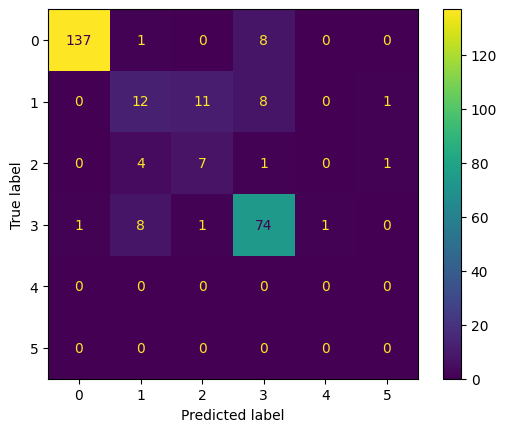

In [13]:
matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix)
cm_display.plot()
plt.show()

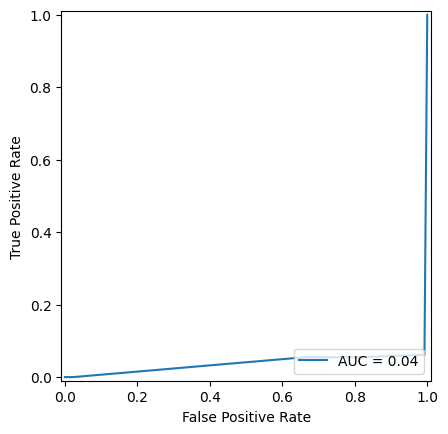

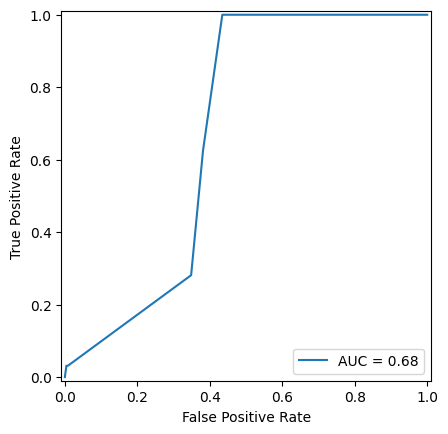

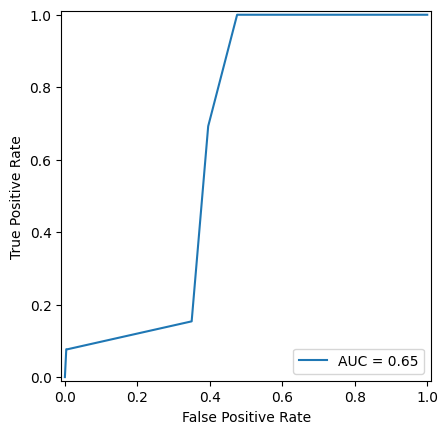

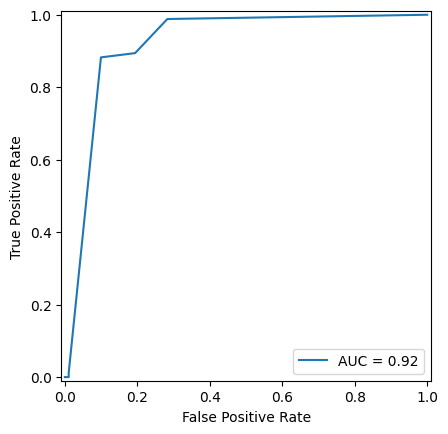

/home/oliver/Documents/Uni/SIT324/9.3HD/.venv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


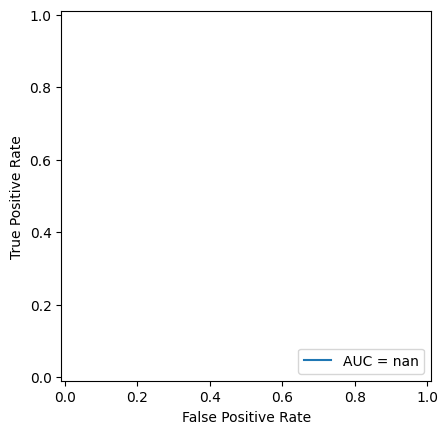

/home/oliver/Documents/Uni/SIT324/9.3HD/.venv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


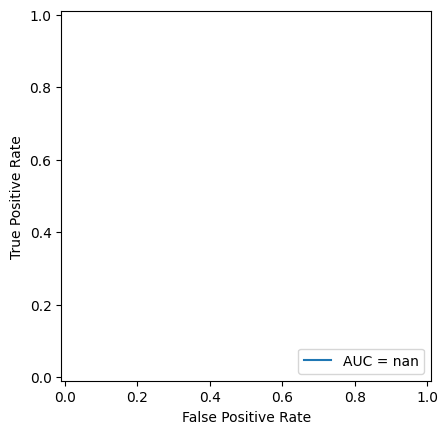

In [14]:
index = 0
while index < len(labels):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=index)
    roc_auc = auc(fpr, tpr)

    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

    display.plot()

    plt.show()
    index += 1

In [15]:
print(accuracy_score(y_test, y_pred))

0.8333333333333334


# SVM

In [16]:
model = LinearSVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred = np.array(y_pred)
y_test = np.array(y_test)

/home/oliver/Documents/Uni/SIT324/9.3HD/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [17]:
y_test_split = [[],[],[],[],[],[],[],[],[]]
y_pred_split = [[],[],[],[],[],[],[],[],[]]
y_test_bin = []
y_pred_bin = []

index = 0
while index < len(y_pred):
    if y_test[index] == y_pred[index]:
        y_test_split[y_test[index]].append(1)
        y_pred_split[y_test[index]].append(1)
        y_test_bin.append(1)
        y_pred_bin.append(1)
    else:
        y_test_split[y_test[index]].append(1)
        y_pred_split[y_test[index]].append(0)
        y_test_bin.append(0)
        y_pred_bin.append(1)
    index += 1

In [18]:
labelIndex = 0
while labelIndex < len(labels):
    print(labels[labelIndex] + ":")
    print(str(precision_score(y_test, y_pred, labels=[labelIndex], average="macro")))
    print(str(recall_score(y_test, y_pred, labels=[labelIndex], average="macro")))
    labelIndex += 1



bengin:
0.9795918367346939
0.9863013698630136
trojan:
0.5517241379310345
0.5
worm:
0.42857142857142855
0.46153846153846156
backdoor:
0.8780487804878049
0.8470588235294118
encrypter:
0.0
0.0
downloader:
0.0
0.0


/home/oliver/Documents/Uni/SIT324/9.3HD/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/oliver/Documents/Uni/SIT324/9.3HD/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


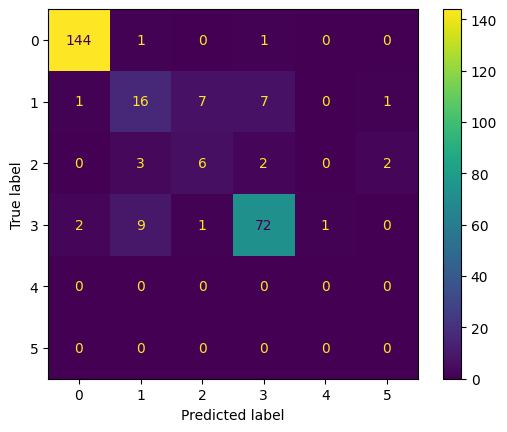

In [19]:
matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix)
cm_display.plot()
plt.show()

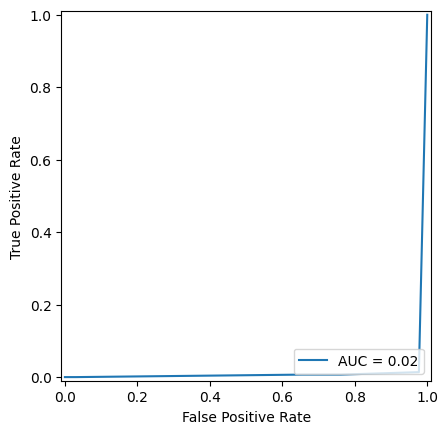

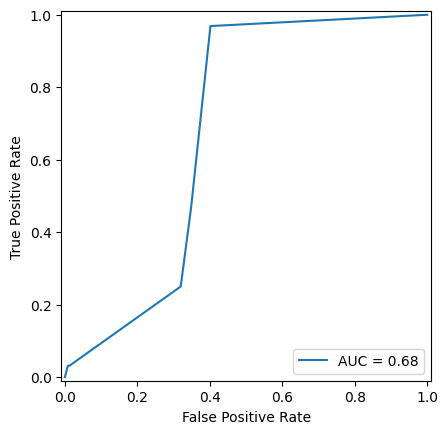

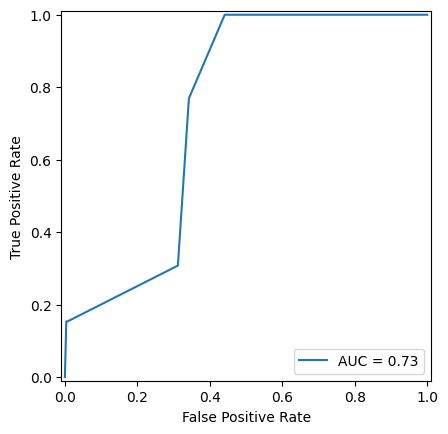

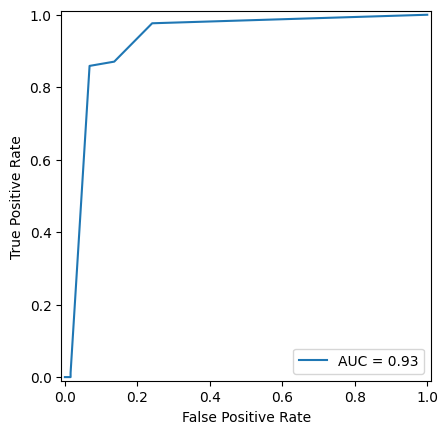

/home/oliver/Documents/Uni/SIT324/9.3HD/.venv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


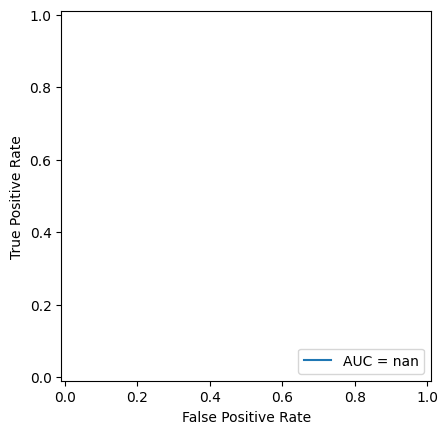

/home/oliver/Documents/Uni/SIT324/9.3HD/.venv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


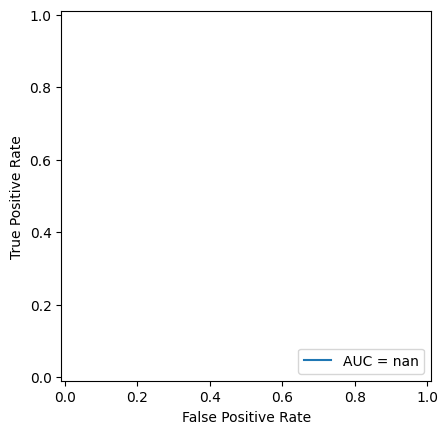

In [20]:
index = 0
while index < len(labels):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=index)
    roc_auc = auc(fpr, tpr)

    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

    display.plot()

    plt.show()
    index += 1

In [21]:
print(accuracy_score(y_test, y_pred))

0.8623188405797102
